Adapted from [this stackoverflow post](https://stackoverflow.com/questions/17291455/how-to-get-an-average-picture-from-100-pictures-using-pil).

In [1]:
import os, PIL
import numpy as np
from PIL import Image

# Access all PNG files in directory
data_dir = "C:/csci490/images/glyph/labeled/0"
allfiles=os.listdir(data_dir)
imlist=[data_dir + "/" + filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]
imlist[:5]


['C:/csci490/images/glyph/labeled/0/002_ygj9mj_t200_r9_01.png',
 'C:/csci490/images/glyph/labeled/0/003_yg5cur_t200_r10_01.png',
 'C:/csci490/images/glyph/labeled/0/003_yg5cur_t200_r10_03.png',
 'C:/csci490/images/glyph/labeled/0/003_yg5cur_t200_r10_06.png',
 'C:/csci490/images/glyph/labeled/0/006_yf5x7q_t200_r5_04.png']

In [2]:
def average_img_2(imlist):
    # Alternative method using PIL blend function
    N = len(imlist)
    avg=Image.open(imlist[0])
    for i in range(1,N):
        img=Image.open(imlist[i])
        avg=Image.blend(avg,img,1.0/float(i+1))
    return avg

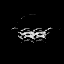

In [3]:
average_img_2(imlist)

In [4]:
def average_img_3(imlist):
    # Alternative method using numpy mean function
    images = np.array([np.array(Image.open(fname)) for fname in imlist])
    arr = np.array(np.mean(images, axis=(0)), dtype=np.uint8)
    out = Image.fromarray(arr)
    return out

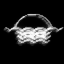

In [5]:
average_img_3(imlist)

In [6]:
# Access all PNG files in directory
# data_dir = "C:/csci490/images/glyph/labeled/"
# subdirs=os.listdir(data_dir)
# for subdir in subdirs:
#     path = data_dir + subdir
#     glyphs=os.listdir(path)
#     # for glyph in glyphs:
#         # img_path = path + glyph
#         # print(img_path)
#     # print(path+glyphs[0])
#     imlist=[path + "/" + glyph for glyph in glyphs if  glyph[-4:] in [".png",".PNG"]]
#     # print(imlist[0])
#     average_img_2(imlist).show()

KeyboardInterrupt: 

In [7]:
# Access all PNG files in directory
imlist_list = []
data_dir = "C:/csci490/images/glyph/labeled/"
subdirs=os.listdir(data_dir)
for subdir in subdirs:
    path = data_dir + subdir
    glyphs=os.listdir(path)
    # for glyph in glyphs:
        # img_path = path + glyph
        # print(img_path)
    # print(path+glyphs[0])
    imlist=[path + "/" + glyph for glyph in glyphs if  glyph[-4:] in [".png",".PNG"]]
    # print(imlist[0])
    # average_img_2(imlist)
    imlist_list.append(imlist)

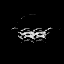

In [8]:
average_img_2(imlist_list[0])

In [9]:
import numpy as np
import matplotlib.pyplot as plt

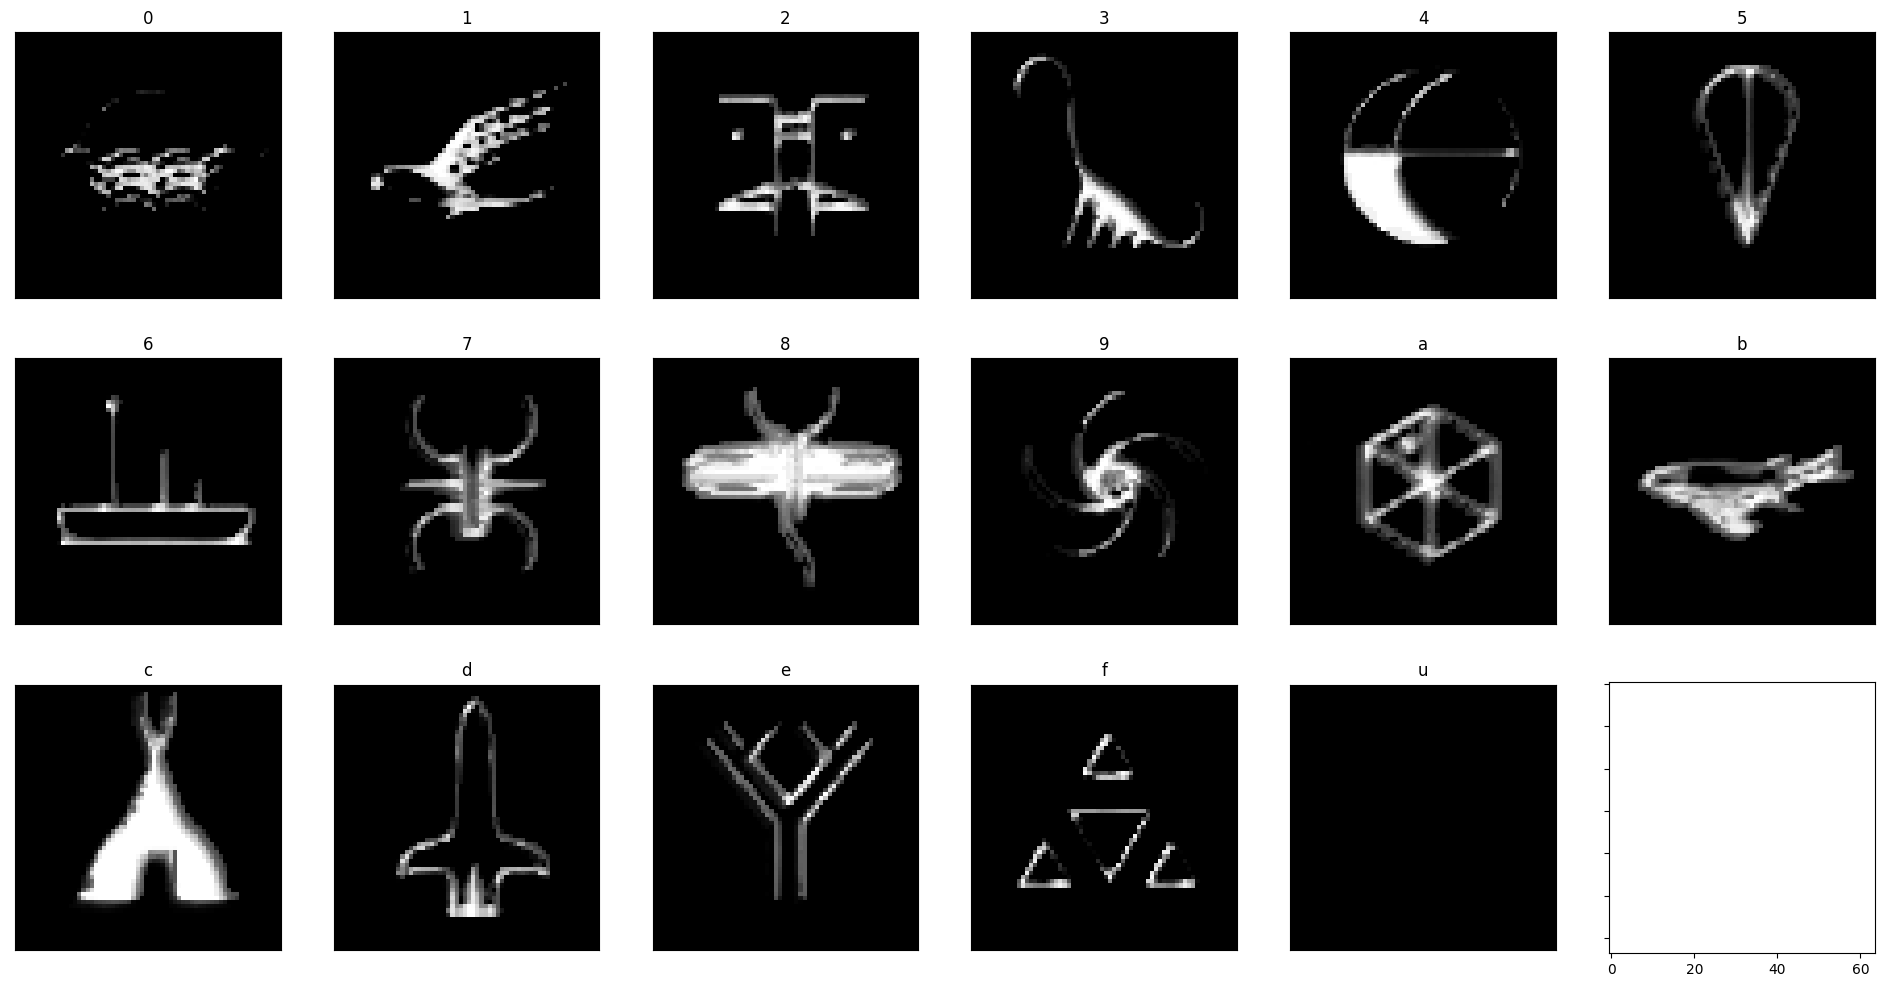

In [11]:
# https://becominghuman.ai/simple-neural-network-on-mnist-handwritten-digit-dataset-61e47702ed25
# Display some images
num_cols = 6
num_rows = 3
fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, sharex=True, sharey=True, figsize=(num_cols*4, num_rows*4))

labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "a", "b", "c", "d", "e", "f","u"]

for row in range(num_rows):
    for col in range(num_cols):
        index = row*num_cols+col
        if index >= len(labels): break
        # print(index)
        im = average_img_2(imlist_list[index])
        im_array = np.asarray(im)
        axes[row][col].set_title(labels[index])
        axes[row][col].imshow(im_array, cmap='gray')
        axes[row][col].get_xaxis().set_visible(False)
        axes[row][col].get_yaxis().set_visible(False)
plt.show()